In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([5,7,9,21,21,21,14,17,13,11,14,14,9,9,9,4,7,4])
y = np.array([53,53,53,65,57,52,48,49,49,66,66,56,46,54,59,56,56,56])
rodilla = pd.DataFrame({"unidades":x,"dias":y})

In [3]:
# media
media_x = np.mean(rodilla.unidades)
media_y = np.mean(rodilla.dias)
# desviacion
std_x = np.sqrt(np.sum((x-media_x)**2) / (len(x-1)))
std_y = np.sqrt(np.sum((y-media_y)**2) / (len(y-1)))

Text(0, 0.5, 'dias')

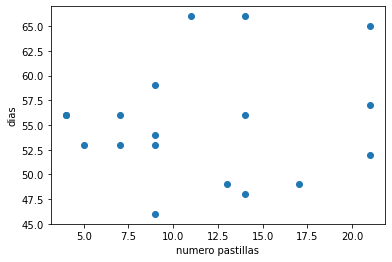

In [4]:
plt.scatter(x,y)
plt.xlabel("numero pastillas")
plt.ylabel("dias")

In [5]:
varianza_x = np.sum((x-media_x)**2) / (len(x-1))
varianza_y = np.sum((y-media_y)**2) / (len(y-1))

In [6]:
covarianza = np.sum((x-media_x)*(y-media_y)) / len(x)

person = covarianza / np.sqrt(varianza_x*varianza_y)

In [7]:
# primer ejercicio
print("la media x",media_x)
print("la media y",media_y)
print("la varianza x", round(varianza_x,2))
print("la varianza y", round(varianza_y,2))
print("la std x",round(std_x,2))
print("la std y",round(std_y,2))
print("la covarianza",round(covarianza,2))
print("el coef de corr",round(person,2))

la media x 11.61111111111111
la media y 55.22222222222222
la varianza x 30.13
la varianza y 32.73
la std x 5.49
la std y 5.72
la covarianza 4.03
el coef de corr 0.13


In [8]:
print(f"el 68% de datos pastillas entre:{media_x-std_x} y {media_x + std_x}")
print(f"el 685 datos dias seria entre:{media_y-std_y} y {media_y + std_y}")

el 68% de datos pastillas entre:6.122345930318937 y 17.099876291903286
el 685 datos dias seria entre:49.501348594730665 y 60.94309584971378


In [9]:
pastillas_cut = pd.cut(x,bins=10,include_lowest=True,right=True)
rodilla.groupby(pastillas_cut)["dias"].agg(["count","mean"])

,count,mean
"(3.982, 5.7]",3,55.00
"(5.7, 7.4]",2,54.50
"(7.4, 9.1]",4,53.00
"(9.1, 10.8]",0,NaN
"(10.8, 12.5]",1,66.00
"(12.5, 14.2]",4,54.75
"(14.2, 15.9]",0,NaN
"(15.9, 17.6]",1,49.00
"(17.6, 19.3]",0,NaN
"(19.3, 21.0]",3,58.00


In [ ]:
# no hay una correlacion muy clara entre las variables, vemos que entre 6 y 17 pastillas podemos tener unos dias de curacion entre 49 y 60 dias ( al que pertenecen el 68% de los datos)

Text(0, 0.5, 'venta')

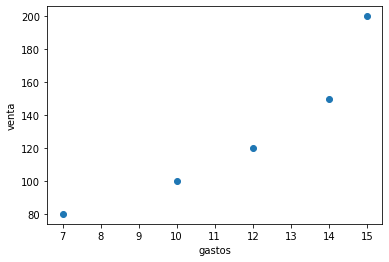

In [11]:
# marketing 
gastos = np.array([10,15,7,12,14])
ventas = np.array([100,200,80,120,150])
# grafico
plt.scatter(gastos,ventas)
plt.xlabel("gastos")
plt.ylabel("venta")

In [20]:
var = np.sum((gastos-np.mean(gastos))*(ventas-np.mean(ventas))) / len(gastos)
coef_marketing = var / np.sqrt(np.var(gastos)*np.var(ventas))

In [21]:
coef_marketing

0.9300324093471208

In [6]:
# ultima prueba aeropuerto
frecuencia = np.array([30,25,13,6,5,4])
punto_medio = np.array([5,15,25,35,45,55])
media_minutos = np.sum(frecuencia*punto_medio) / np.sum(frecuencia)
suma_frecuencia = np.sum(frecuencia)


In [5]:
media_minutos

18.132530120481928

In [8]:
varianza = np.sum(((punto_medio-media_minutos)**2)*(frecuencia)) / suma_frecuencia

In [9]:
varianza

202.23544781535782

In [11]:
std = np.sqrt(varianza)
std

14.220951016558555

In [12]:
#2
clientes = np.array([26.88,28.60, 20.73, 34.00 ,35.87, 25.99, 20.94, 26., 29.54, 26.27,
26.51, 29.70, 29.55 ,33.52 ,30.49 ,31.49 ,21.28, 23.57, 22.47, 23.15,
19.51 ,23.85 ,30.98 ,9.81 ,26.59 ,29.68 ,30.48 ,25.38, 23.49 ,25.11,
19.35, 33.80 ,23.14 ,13.56 ,24.63 ,24.26 ,37.18 ,22.20 ,21.37 ,28.30,
11.02 ,25.59 ,24.38, 25.29 ,29.17 ,25.55 ,26.94 ,27.24 ,19.10 ,27.44])

In [13]:
media = np.sum(clientes) / len(clientes)
media

25.6188

In [15]:
varianza_clientes = np.sum((clientes-media)**2) / len(clientes)
varianza_clientes

30.280918559999996

In [17]:
desviacion = np.sqrt(varianza_clientes)
desviacion

5.502810060323725

In [20]:
np.percentile(clientes,90)

31.693

In [22]:
# suiza
path = "https://gist.githubusercontent.com/christophsax/178d34245afdd6e187b1fff72dbe7448/raw/f5f4189f949f117bee4e82e4aa75c104ed20b4f4/swiss.csv"
swiss = pd.read_csv(path)
swiss.head(3)

,Location,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [27]:
def estadistica(data):
    ax = sns.distplot(data)
    ax.axvline(data.mean(),color="r")
    ax.axvline(data.median(),color="g")
    print(f"skew: {data.skew()}")
    print(f"kurt: {data.kurt()}")
    print(f"media: {data.mean()}")


skew: -0.48628636060376224
kurt: 0.5890586312398916
media: 70.14255319148937


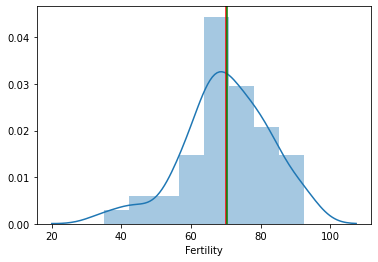

In [28]:
estadistica(swiss.Fertility)

skew: -0.3418760931774049
kurt: -0.7444686606404267
media: 50.65957446808509


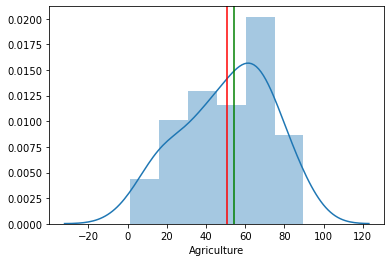

In [29]:
estadistica(swiss.Agriculture)

In [49]:
swiss.describe().T

,count,mean,std,min,25%,50%,75%,max
Fertility,47.0,70.142553,12.491697,35.00,64.700,70.40,78.450,92.5
Agriculture,47.0,50.659574,22.711218,1.20,35.900,54.10,67.650,89.7
Examination,47.0,16.489362,7.977883,3.00,12.000,16.00,22.000,37.0
Education,47.0,10.978723,9.615407,1.00,6.000,8.00,12.000,53.0
Catholic,47.0,41.143830,41.704850,2.15,5.195,15.14,93.125,100.0
Infant.Mortality,47.0,19.942553,2.912697,10.80,18.150,20.00,21.700,26.6


In [53]:
primer_cuartil_educacion = np.percentile(swiss.Education,25)
df_primer_cuartil_educacion = swiss.loc[swiss.Education <=primer_cuartil_educacion]

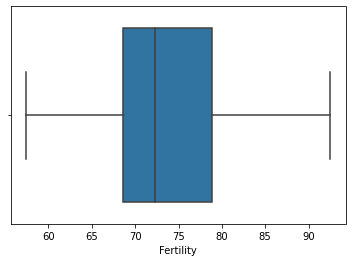

In [55]:
sns.boxplot(df_primer_cuartil_educacion.Fertility)

In [76]:
cuartiles_educacion = pd.qcut(swiss.Education,q=[0, .25, .5, .75, 1.],labels=["Q1","Q2","Q3","Q4"])

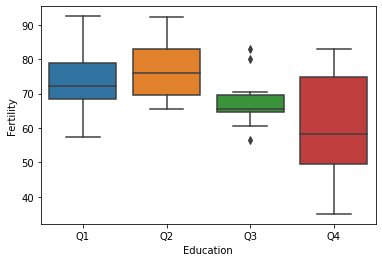

In [77]:
sns.boxplot(x=cuartiles_educacion,y=swiss.Fertility,data=swiss)


In [80]:
swiss.groupby(cuartiles_educacion)["Fertility"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Q1,14.0,74.335714,10.622010,57.4,68.55,72.25,78.875,92.5
Q2,11.0,76.718182,8.666928,65.4,69.65,76.10,83.100,92.4
Q3,11.0,67.736364,7.829594,56.6,64.55,65.50,69.650,83.1
Q4,11.0,60.636364,16.023437,35.0,49.50,58.30,74.800,82.9


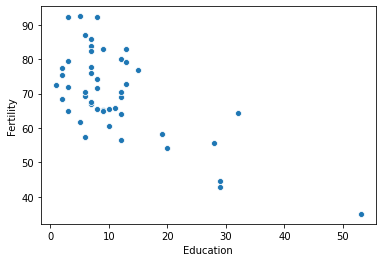

In [64]:
sns.scatterplot(x=swiss.Education,y=swiss.Fertility)

In [72]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


In [75]:
swiss.Agriculture.kurt()

-0.7444686606404267